In [1]:
import numpy as np
import matplotlib.pyplot as plt
#!pip install --upgrade --force-reinstall pandas
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 # Update with your file path
 file_path = '/content/drive/MyDrive/Video_Games_Sales_as_at_22_Dec_2016.csv'
 df = pd.read_csv(file_path)

In [4]:
print(df.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Developer Rating

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
df.isnull().sum()


,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [17]:
df.isna().sum()

,0
Name,2
Platform,0
Year_of_Release,0
Genre,2
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [5]:
df.shape
missing_percent = df.isna().sum() / len(df) * 100
print(missing_percent)

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         54.602548
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


In [8]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [4]:
# Fill missing values
# Assuming the column is named 'Year_of_Release'
df["Year_of_Release"].fillna(df["Year_of_Release"].median(), inplace=True)
df["Publisher"].fillna("Unknown", inplace=True)

In [18]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [5]:
#sing KNNImputer to fill in missing values (NaNs) in the numerical columns: 'Critic_Score', 'Critic_Count', 'User_Score', and 'User_Count'.
!pip install sklearn
import pandas as pd
from sklearn.impute import KNNImputer

# Assuming df is your DataFrame

# Select numerical columns for imputation
numerical_cols = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Create KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the imputer on the selected columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [20]:
# Select categorical columns for imputation
categorical_cols = ['Developer', 'Rating']

# Fill missing values with the mode for each column
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

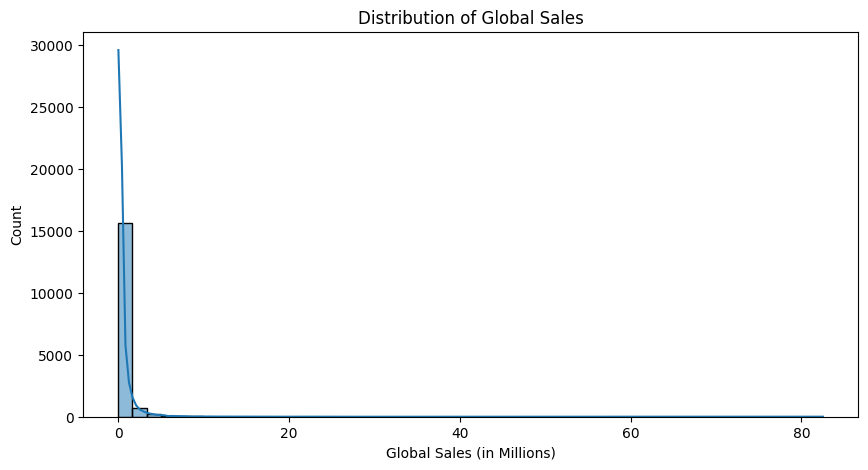

In [11]:
# Plot the distribution of global sales
import seaborn as sns # Importing seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df["Global_Sales"], bins=50, kde=True)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (in Millions)")
plt.show()

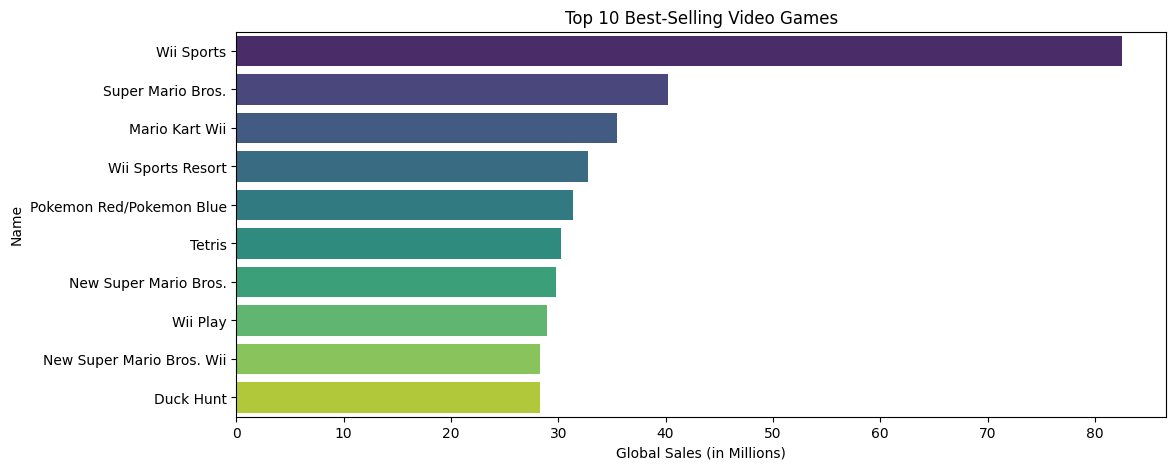

In [20]:
# Get top 10 highest selling games
top_games = df.nlargest(10, "Global_Sales")[["Name", "Global_Sales"]]

# Bar plot
plt.figure(figsize=(12, 5))
sns.barplot(y=top_games["Name"], x=top_games["Global_Sales"], palette="viridis")
plt.title("Top 10 Best-Selling Video Games")
plt.xlabel("Global Sales (in Millions)")
plt.show()


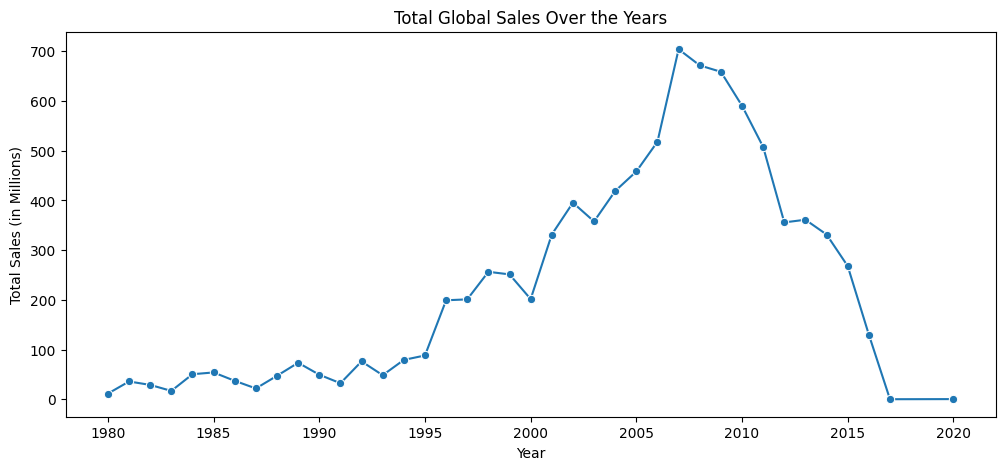

In [21]:
# Group sales by year
yearly_sales = df.groupby("Year_of_Release")["Global_Sales"].sum()

# Line plot of sales over years
plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker="o")
plt.title("Total Global Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales (in Millions)")
plt.show()


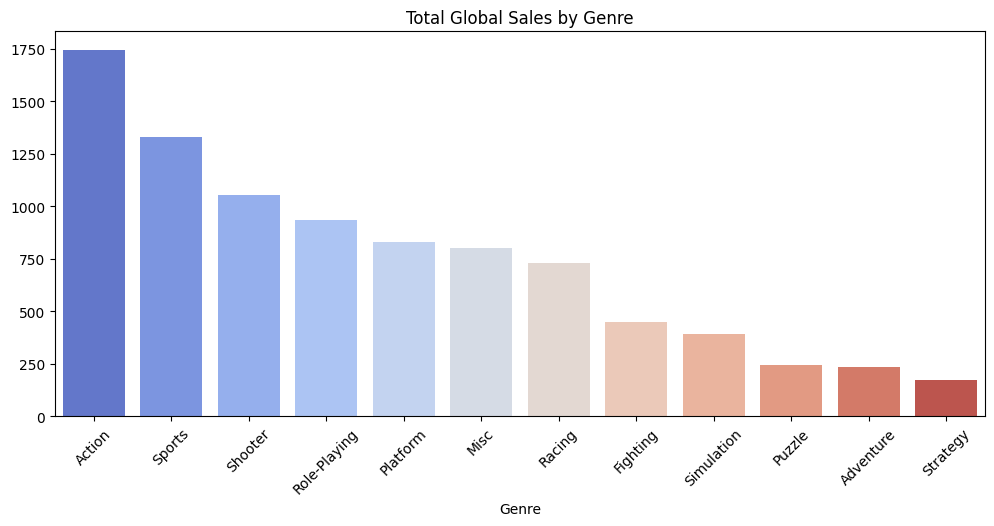

In [22]:
# Total sales by genre
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="coolwarm")
plt.title("Total Global Sales by Genre")
plt.xticks(rotation=45)
plt.show()


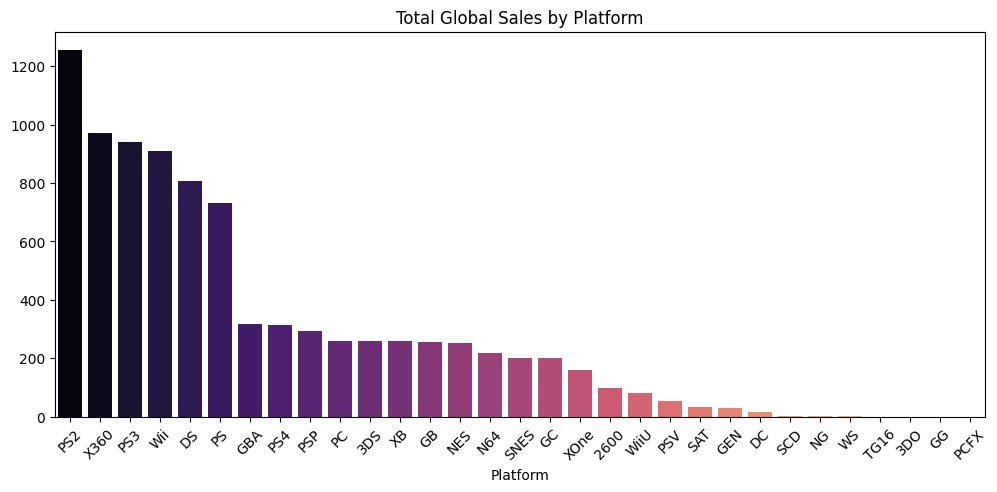

In [10]:
# Total sales by platform
platform_sales = df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12, 5))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette="magma")
plt.title("Total Global Sales by Platform")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Install CatBoost (if not already installed)
#!pip install catboost

from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

#X['Platform'] = X['Platform'].astype(str)
#X['Genre'] = X['Genre'].astype(str)

# Feature selection and dummy variables (example)
features = ['Critic_Score', 'User_Score', 'Platform', 'Genre']
# Fill NaN values in features before creating dummies to prevent NaN propagation
for feature in features:
    if df[feature].isnull().any():  # Check if the feature has any missing values
        if pd.api.types.is_numeric_dtype(df[feature]):
            df[feature].fillna(df[feature].median(), inplace=True)  # Fill with median for numerical features
        else:
            df[feature].fillna(df[feature].mode()[0], inplace=True)  # Fill with mode for categorical features


X = df[features]
y = df['Global_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assume 'Platform' and 'Genre' are raw (non-one-hot) categorical columns
cat_features = [ 'Platform','Genre']  # These should be raw categorical (not one-hot encoded)

# Split data (ensure categorical columns are not one-hot encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, verbose=0)

# Fit model
model.fit(X_train, y_train, cat_features=cat_features)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 3.87
R-squared (R2): 0.06


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ... (your previous code) ...

# Feature selection and dummy variables (example)
features = ['Critic_Score', 'User_Score', 'Platform', 'Genre']
X = pd.get_dummies(df[features], drop_first=True)
y = df['Global_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.949320506102689


In [11]:
!pip install xgboost
from xgboost import XGBRegressor

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"XGBoost Regression MSE: {mse}")

XGBoost Regression MSE: 3.988417451833026
